In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Añadiendo ruido de medicion

In [ ]:

class PenduloSimple:
    def __init__(self, estado_inicial=None, m=1.0, l=1.0, g=9.81, b=0.1, k_steps=1000, T=0.01):
        """
        Inicializa el péndulo simple
        estado_inicial: estado inicial [theta, theta_dot]
        m: masa (kg)
        l: longitud (m)
        g: aceleración gravitacional (m/s^2)
        b: coeficiente de fricción
        k_steps: número de pasos de simulación
        T: período de muestreo (s)
        """
        if estado_inicial is None:
            estado_inicial = np.array([np.pi/4, 0])
            
        self.m = m  # masa
        self.l = l  # longitud
        self.g = g  # gravedad
        self.b = b  # fricción
        self.k = 0  # paso actual
        self.T = T  # período de muestreo
        self.k_steps = k_steps  # número total de pasos
        
        # Inicializar arrays para almacenar la solución
        self.estados = np.zeros((k_steps, 2))  # [k_steps filas x 2 columnas]
        self.estados[0] = estado_inicial  # guardar estado inicial

        np.random.seed(158)
        self.ruido = np.random.uniform(0,0.01,(k_steps, 2))  # [k_steps filas x 2 columnas]
        
        # Array de tiempo para la simulación
        self.t = np.arange(0, k_steps*T, T)
        
    def ecuaciones_estado(self, estado, t, u=0):
        """
        Ecuaciones de estado del péndulo
        estado[0] = theta (ángulo)
        estado[1] = theta_dot (velocidad angular)
        u = torque de control
        """
        theta = estado[0]
        theta_dot = estado[1]
        
        # Ecuaciones diferenciales
        dtheta = theta_dot
        dtheta_dot = (-self.b*theta_dot - self.m*self.g*self.l*np.sin(theta) + u)/(self.m*self.l**2)
        
        return np.array([dtheta, dtheta_dot])
    
    def simular_paso(self, u=0):
        """
        Simula un paso del sistema usando método de Euler
        u: entrada de control (puede ser escalar o función)
        """
        if self.k >= self.k_steps - 1:
            return None
        
        estado_actual = self.estados[self.k] + self.ruido[self.k]
        t_actual = self.t[self.k]
        
        # Calcular entrada de control
        if callable(u):
            u_k = u(estado_actual, t_actual)
        else:
            u_k = u
            
        # Calcular derivadas
        derivadas = self.ecuaciones_estado(estado_actual, t_actual, u_k)
        
        # Método de Euler
        self.estados[self.k + 1] = estado_actual + self.T * derivadas
        
        self.k += 1
        return self.estados[self.k]
    
    def simular_todo(self, u=0):
        """
        Simula todo el sistema desde el estado actual hasta k_steps
        u: entrada de control (puede ser escalar o función)
        """
        while self.k < self.k_steps - 1:
            self.simular_paso(u)
        
        return self.estados
    
    def obtener_estados(self):
        """
        Devuelve los estados simulados hasta el momento
        """
        return self.estados[:self.k + 1]
    
    def obtener_tiempo(self):
        """
        Devuelve el vector de tiempo hasta el momento actual
        """
        return self.t[:self.k + 1]
    
    def parametros(self):
        """
        Devuelve los parámetros del sistema
        """
        return {'m': self.m, 'l': self.l, 'g': self.g, 'b': self.b}



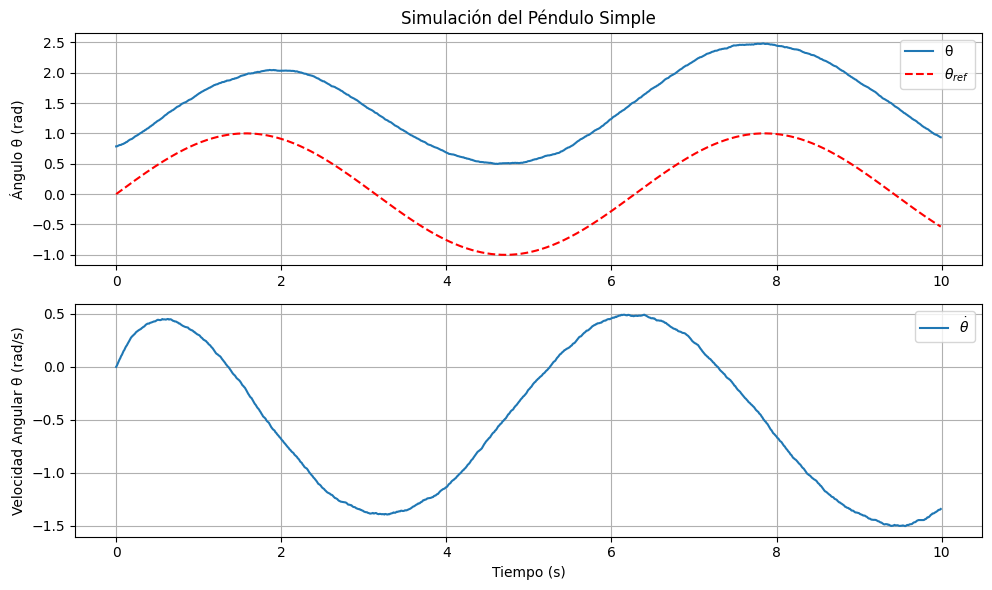

In [19]:
def control_retroalimentacion(estado, t):
    theta_ref = np.sin(t)
    dtheta_ref = np.cos(t)  
    ddtheta_ref = -np.sin(t)  
    theta,dtheta = estado+ np.random.normal(0,0.002,(estado.shape) )
    k1,k2 = 2,1
    
    e = theta - theta_ref  # Error
    de = dtheta - dtheta_ref  # Derivada del error

    u = m*l**2*( ddtheta_ref - k1*(de) -k2*(e) + (b/(m*l**2))*dtheta + (g/l)*np.sin(theta) )  # Control
    return u  

pendulo = PenduloSimple(k_steps=1000, T=0.01)
param = pendulo.parametros()

m,l,g,b = param['m'],param['l'],param['g'], param['b']
estados = pendulo.simular_todo(u=control_retroalimentacion)

# Obtener vectores de tiempo y estados
t = pendulo.obtener_tiempo()
theta = estados[:, 0]
theta_dot = estados[:, 1]

# Calcular referencia
theta_ref = np.sin(t)
dtheta_ref = np.cos(t)

# Graficar resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.plot(t, theta)
plt.plot(t, theta_ref, 'r--')
plt.legend(['θ', '$θ_{ref}$'])
plt.grid(True)
plt.ylabel('Ángulo θ (rad)')
plt.title('Simulación del Péndulo Simple')

plt.subplot(2,1,2)
plt.plot(t, theta_dot)
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular θ̇ (rad/s)')
plt.legend(['$\\dot{θ}$'])
plt.tight_layout()
plt.show()

# Sin clases

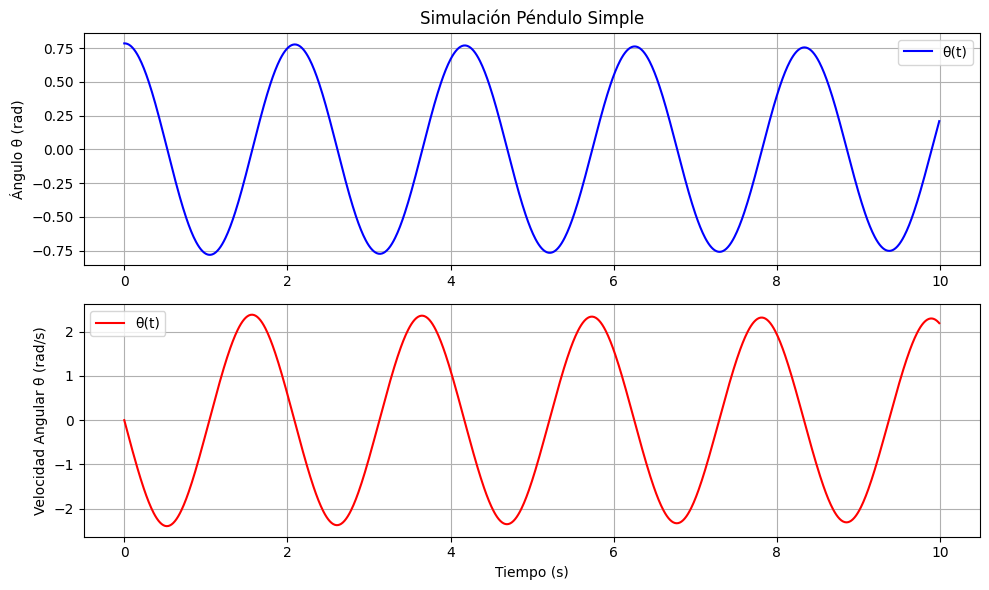

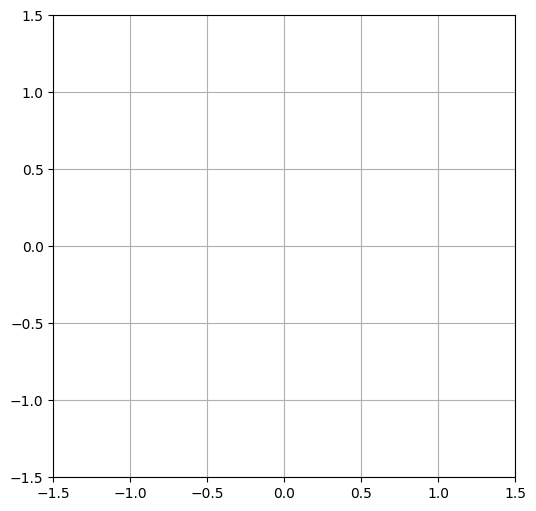

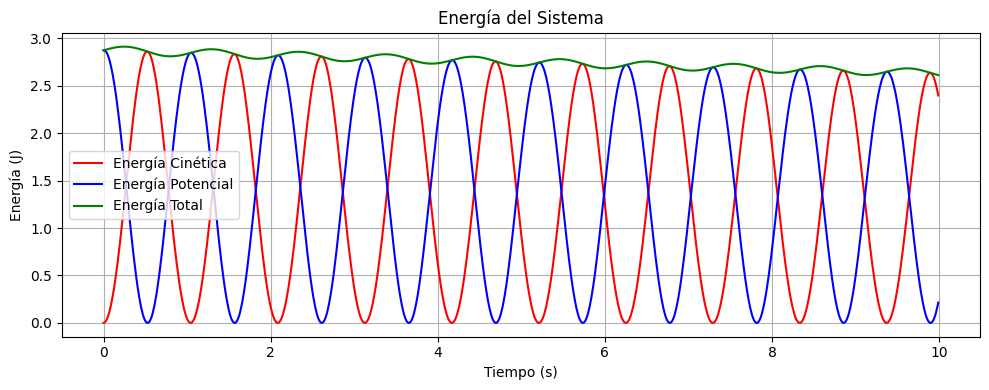

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
m = 1.0     # masa (kg)
l = 1.0     # longitud (m)
g = 9.81    # gravedad (m/s²)
b = 0.1     # fricción (N⋅m⋅s/rad)

# Parámetros de simulación
T = 0.01    # período de muestreo (s)
t_final = 10  # tiempo final de simulación (s)
k_steps = int(t_final/T)  # número de pasos

# Vectores para almacenar resultados
t = np.arange(0, t_final, T)  # vector de tiempo
theta = np.zeros(k_steps)      # ángulo
theta_dot = np.zeros(k_steps)  # velocidad angular

# Condiciones iniciales
theta[0] = np.pi/4    # 45 grados
theta_dot[0] = 0      # velocidad inicial cero

def control_retroalimentacion(estado, t):
    theta_ref = np.sin(t)
    dtheta_ref = np.cos(t)  
    ddtheta_ref = -np.sin(t)  
    theta,dtheta = estado+ np.random.normal(0,0.002,(estado.shape) )
    k1,k2 = 2,1
    
    e = theta - theta_ref  # Error
    de = dtheta - dtheta_ref  # Derivada del error

    u = m*l**2*( ddtheta_ref - k1*(de) -k2*(e) + (b/(m*l**2))*dtheta + (g/l)*np.sin(theta) )  # Control
    return u  

# Simulación usando método de Euler
for k in range(k_steps-1):
    # Entrada de control (en este caso 0 para oscilación libre)
    u = 0#control_retroalimentacion([theta[k], theta_dot[k]], t[k])
    
    # Ecuaciones de estado
    dtheta = theta_dot[k]
    dtheta_dot = (-b*theta_dot[k] - m*g*l*np.sin(theta[k]) + u)/(m*l**2)
    
    # Integración de Euler
    theta[k+1] = theta[k] + T*dtheta
    theta_dot[k+1] = theta_dot[k] + T*dtheta_dot

# Graficar resultados
plt.figure(figsize=(10, 6))

# Gráfica del ángulo
plt.subplot(2,1,1)
plt.plot(t, theta, 'b-', label='θ(t)')
plt.grid(True)
plt.ylabel('Ángulo θ (rad)')
plt.title('Simulación Péndulo Simple')
plt.legend()

# Gráfica de la velocidad angular
plt.subplot(2,1,2)
plt.plot(t, theta_dot, 'r-', label='θ̇(t)')
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular θ̇ (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()

# Animación opcional del péndulo
import matplotlib.animation as animation

# Crear figura para animación
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
ax.grid()

# Elementos para la animación
line, = ax.plot([], [], 'o-', lw=2)
time_template = 'tiempo = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Función de inicialización
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

# Función de animación
def animate(i):
    x = [0, l*np.sin(theta[i])]
    y = [0, -l*np.cos(theta[i])]
    line.set_data(x, y)
    time_text.set_text(time_template % (i*T))
    return line, time_text

# Crear animación
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                            interval=T*1000, blit=True, init_func=init)

plt.show()

# Calcular energía del sistema
energia_cinetica = 0.5 * m * (l * theta_dot)**2
energia_potencial = m * g * l * (1 - np.cos(theta))
energia_total = energia_cinetica + energia_potencial

# Graficar energía
plt.figure(figsize=(10, 4))
plt.plot(t, energia_cinetica, 'r-', label='Energía Cinética')
plt.plot(t, energia_potencial, 'b-', label='Energía Potencial')
plt.plot(t, energia_total, 'g-', label='Energía Total')
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía (J)')
plt.title('Energía del Sistema')
plt.legend()
plt.tight_layout()
plt.show()

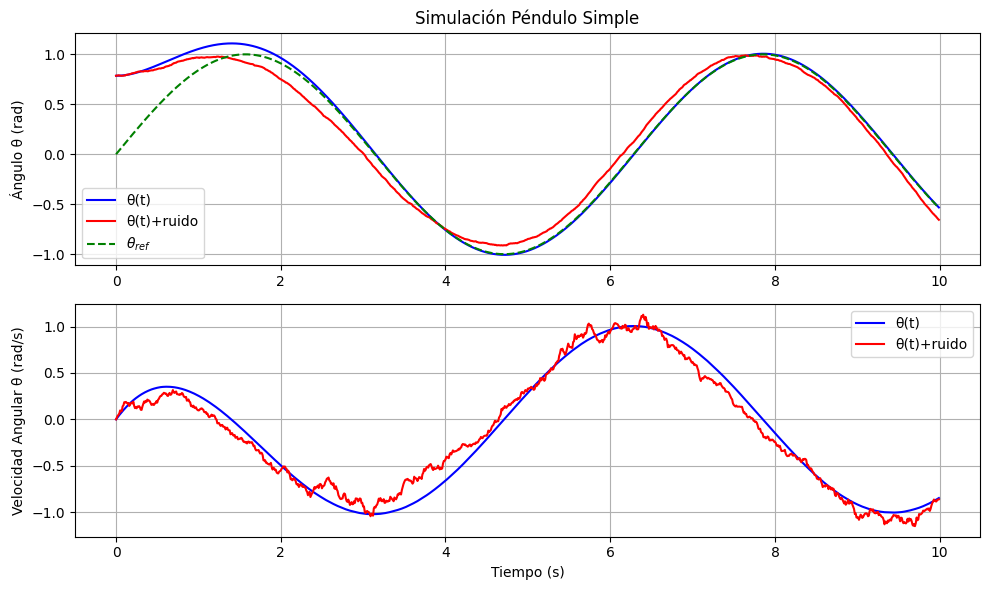

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
m = 1.0     # masa (kg)
l = 1.0     # longitud (m)
g = 9.81    # gravedad (m/s²)
b = 0.1     # fricción (N⋅m⋅s/rad)

# Parámetros de simulación
T = 0.01    # período de muestreo (s)
t_final = 10  # tiempo final de simulación (s)
k_steps = int(t_final/T)  # número de pasos

# Vectores para almacenar resultados
t = np.arange(0, t_final, T)  # vector de tiempo
theta = np.zeros(k_steps)      # ángulo
theta_dot = np.zeros(k_steps)  # velocidad angular

theta_ruido = np.zeros(k_steps)      # ángulo
theta_ruido_dot = np.zeros(k_steps)  # velocidad angular

# Condiciones iniciales
theta[0] = np.pi/4    # 45 grados
theta_dot[0] = 0      # velocidad inicial cero
theta_ruido[0] = np.pi/4    # 45 grados
theta_ruido_dot[0] = 0      # velocidad inicial cero

# Calcular referencia
theta_ref = np.sin(t)
dtheta_ref = np.cos(t)

def control_retroalimentacion(estado, t):
    theta_ref = np.sin(t)
    dtheta_ref = np.cos(t)  
    ddtheta_ref = -np.sin(t)  
    theta,dtheta = estado+ np.random.normal(0,0.002,(estado.shape) )
    k1,k2 = 2,1
    
    e = theta - theta_ref  # Error
    de = dtheta - dtheta_ref  # Derivada del error

    u = m*l**2*( ddtheta_ref - k1*(de) -k2*(e) + (b/(m*l**2))*dtheta + (g/l)*np.sin(theta) )  # Control
    return u  

def system (x,u,ruido=0):
    theta = x[0]
    theta_dot = x[1]

    dtheta = theta_dot + ruido[0]
    dtheta_dot = (-b*theta_dot - m*g*l*np.sin(theta) + u)/(m*l**2) + ruido[1]

    theta_k1 = theta + T*dtheta
    theta_dot_k1 = theta_dot + T*dtheta_dot

    return np.array([theta_k1, theta_dot_k1])


np.random.seed(158)

# Simulación usando método de Euler
for k in range(k_steps-1):
    # Entrada de control (en este caso 0 para oscilación libre)
    #u = 0#control_retroalimentacion([theta[k], theta_dot[k]], t[k])

    x = np.array([theta_ruido[k], theta_ruido_dot[k]])
    z = x + np.random.normal(0,0.3,(x.shape) )

    u = control_retroalimentacion(z, t[k])
    theta_ruido[k+1], theta_ruido_dot[k+1] = system([theta_ruido[k], theta_ruido_dot[k]], u, np.random.normal(0,0.2,(2,)) )
    
    x = np.array([theta[k], theta_dot[k]])
    z = x
    u = control_retroalimentacion(z, t[k])
    theta[k+1], theta_dot[k+1] = system([theta[k], theta_dot[k]], u, [0,0] )


# Graficar resultados
plt.figure(figsize=(10, 6))

# Gráfica del ángulo
plt.subplot(2,1,1)
plt.plot(t, theta, 'b-', label='θ(t)')
plt.plot(t, theta_ruido, 'r-', label='θ(t)+ruido')
plt.plot(t, theta_ref, 'g--',label='$θ_{ref}$')
plt.legend(['θ','θ+ruido', '$θ_{ref}$'])
plt.grid(True)
plt.ylabel('Ángulo θ (rad)')
plt.title('Simulación Péndulo Simple')
plt.legend()

# Gráfica de la velocidad angular
plt.subplot(2,1,2)
plt.plot(t, theta_dot, 'b-', label='θ̇(t)')
plt.plot(t, theta_ruido_dot, 'r-', label='θ̇(t)+ruido')
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular θ̇ (rad/s)')
plt.legend()
plt.tight_layout()
plt.show()



In [36]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [37]:


# Crear subplots
fig = make_subplots(rows=2, cols=1, 
                   subplot_titles=('Ángulo del Péndulo', 'Velocidad Angular'),
                   vertical_spacing=0.15)

# Añadir trazas para el ángulo
fig.add_trace(
   go.Scatter(x=t, y=theta, name='θ', line=dict(color='blue')),
   row=1, col=1
)
fig.add_trace(
   go.Scatter(x=t, y=theta_ruido, name='θ+ruido', line=dict(color='red')),
   row=1, col=1
)
fig.add_trace(
   go.Scatter(x=t, y=theta_ref, name='θ_ref', 
              line=dict(color='green', dash='dash')),
   row=1, col=1
)

# Añadir trazas para la velocidad angular
fig.add_trace(
   go.Scatter(x=t, y=theta_dot, name='θ̇', line=dict(color='blue')),
   row=2, col=1
)
fig.add_trace(
   go.Scatter(x=t, y=theta_ruido_dot, name='θ̇+ruido', line=dict(color='red')),
   row=2, col=1
)

# Actualizar layout
fig.update_layout(
   title='Simulación Péndulo Simple',
   height=700,
   showlegend=True,
   plot_bgcolor='white',
   legend=dict(
       yanchor="top",
       y=0.99,
       xanchor="left",
       x=1.05
   )
)

# Actualizar ejes
for i in [1, 2]:
   fig.update_xaxes(
       showgrid=True, 
       gridwidth=1, 
       gridcolor='LightGray',
       zeroline=True,
       zerolinewidth=2,
       zerolinecolor='LightGray',
       row=i, 
       col=1
   )
   fig.update_yaxes(
       showgrid=True, 
       gridwidth=1, 
       gridcolor='LightGray',
       zeroline=True,
       zerolinewidth=2,
       zerolinecolor='LightGray',
       row=i, 
       col=1
   )

# Actualizar títulos de los ejes
fig.update_xaxes(title_text='Tiempo (s)', row=2, col=1)
fig.update_yaxes(title_text='Ángulo θ (rad)', row=1, col=1)
fig.update_yaxes(title_text='Velocidad Angular θ̇ (rad/s)', row=2, col=1)

# Mostrar figura
fig.show()

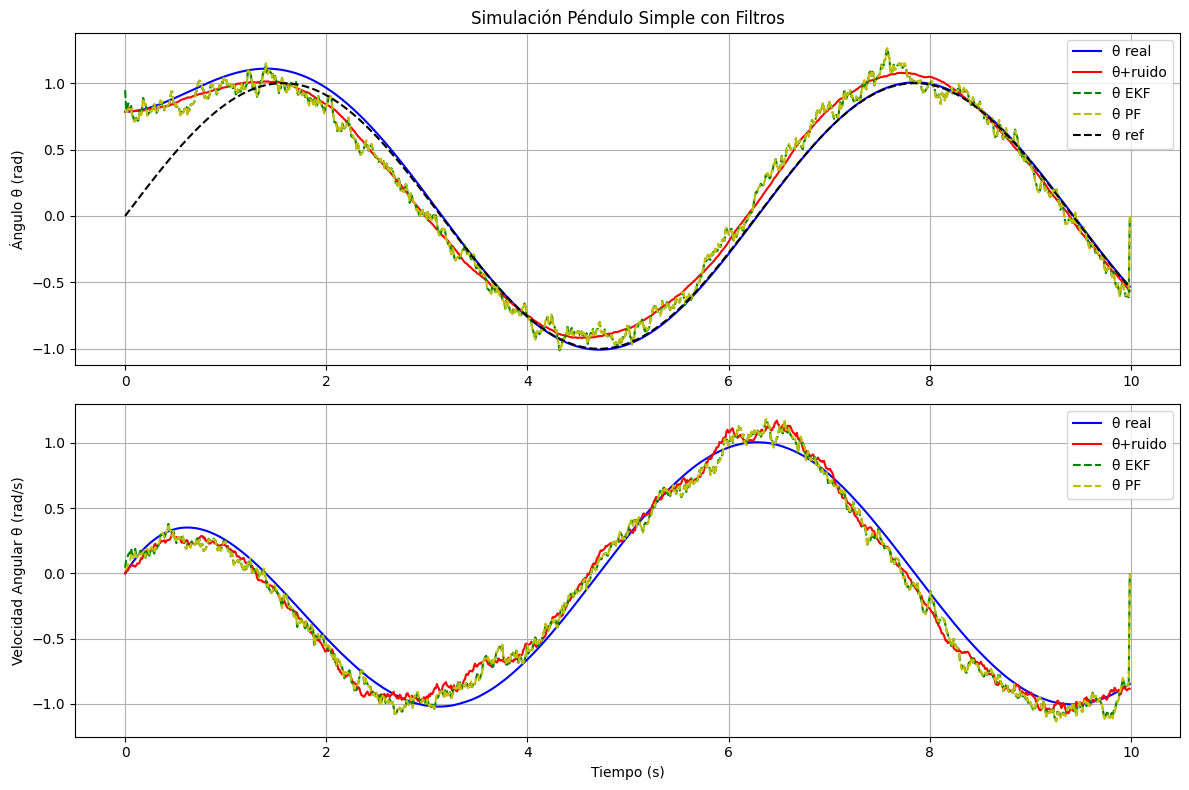

Error RMS EKF: 0.1163
Error RMS PF: 0.1167
Error RMS Medición: 0.0986


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros del sistema (los que ya tenías...)

# Clase para el Filtro de Kalman Extendido
class ExtendedKalmanFilter:
    def __init__(self, x0, P0, Q, R):
        self.x = x0  # Estado inicial
        self.P = P0  # Covarianza inicial
        self.Q = Q   # Covarianza del ruido del proceso
        self.R = R   # Covarianza del ruido de medición
        
    def f(self, x, u):
        """Modelo no lineal del sistema"""
        theta, theta_dot = x
        dtheta = theta_dot
        dtheta_dot = (-b*theta_dot - m*g*l*np.sin(theta) + u)/(m*l**2)
        return np.array([theta + T*dtheta, theta_dot + T*dtheta_dot])
    
    def h(self, x):
        """Función de medición"""
        return x
    
    def F_jacobian(self, x, u):
        """Jacobiano del modelo del sistema"""
        theta, theta_dot = x
        F = np.array([[1, T],
                     [-T*m*g*l*np.cos(theta)/(m*l**2), 1 - T*b/(m*l**2)]])
        return F
    
    def H_jacobian(self, x):
        """Jacobiano de la medición"""
        return np.eye(2)
    
    def predict(self, u):
        # Predicción del estado
        self.x = self.f(self.x, u)
        
        # Predicción de la covarianza
        F = self.F_jacobian(self.x, u)
        self.P = F @ self.P @ F.T + self.Q
        
        return self.x
    
    def update(self, z):
        # Calcular Jacobiano de medición
        H = self.H_jacobian(self.x)
        
        # Innovación
        y = z - self.h(self.x)
        
        # Covarianza de la innovación
        S = H @ self.P @ H.T + self.R
        
        # Ganancia de Kalman
        K = self.P @ H.T @ np.linalg.inv(S)
        
        # Actualización del estado
        self.x = self.x + K @ y
        
        # Actualización de la covarianza
        self.P = (np.eye(2) - K @ H) @ self.P
        
        return self.x

# Clase para el Filtro de Partículas
class ParticleFilter:
    def __init__(self, n_particles, x0, Q):
        self.n_particles = n_particles
        self.Q = Q
        
        # Inicializar partículas
        self.particles = np.tile(x0, (n_particles, 1)) + \
                        np.random.multivariate_normal(np.zeros(2), Q, n_particles)
        self.weights = np.ones(n_particles) / n_particles
        
    def f(self, x, u):
        """Modelo no lineal del sistema"""
        theta, theta_dot = x
        dtheta = theta_dot
        dtheta_dot = (-b*theta_dot - m*g*l*np.sin(theta) + u)/(m*l**2)
        return np.array([theta + T*dtheta, theta_dot + T*dtheta_dot])
    
    def predict(self, u):
        # Propagar partículas
        for i in range(self.n_particles):
            self.particles[i] = self.f(self.particles[i], u)
            self.particles[i] += np.random.multivariate_normal(np.zeros(2), self.Q)
        
        return np.average(self.particles, weights=self.weights, axis=0)
    
    def update(self, z, R):
        # Actualizar pesos
        for i in range(self.n_particles):
            diff = z - self.particles[i]
            self.weights[i] *= np.exp(-0.5 * diff.T @ np.linalg.inv(R) @ diff)
            
        # Normalizar pesos
        self.weights /= np.sum(self.weights)
        
        # Resampling
        if 1.0 / np.sum(self.weights**2) < self.n_particles/2:
            indices = np.random.choice(self.n_particles, self.n_particles, p=self.weights)
            self.particles = self.particles[indices]
            self.weights = np.ones(self.n_particles) / self.n_particles
            
        return np.average(self.particles, weights=self.weights, axis=0)

# Inicialización de filtros
x0 = np.array([np.pi/4, 0])
P0 = np.diag([0.1, 0.1])
Q = np.diag([0.001, 0.001])  # Covarianza del ruido del proceso
R = np.diag([0.04, 0.04])    # Covarianza del ruido de medición

ekf = ExtendedKalmanFilter(x0, P0, Q, R)
pf = ParticleFilter(n_particles=1000, x0=x0, Q=Q)

# Vectores para almacenar estimaciones
theta_ekf = np.zeros(k_steps)
theta_dot_ekf = np.zeros(k_steps)
theta_pf = np.zeros(k_steps)
theta_dot_pf = np.zeros(k_steps)

# Simulación con filtros
for k in range(k_steps-1):
    # Medición con ruido
    x = np.array([theta_ruido[k], theta_ruido_dot[k]])
    z = x + np.random.normal(0,0.2,(x.shape))
    
    # Control
    u = control_retroalimentacion(z, t[k])
    
    # EKF
    ekf.predict(u)
    x_ekf = ekf.update(z)
    theta_ekf[k] = x_ekf[0]
    theta_dot_ekf[k] = x_ekf[1]
    
    # PF
    pf.predict(u)
    x_pf = pf.update(z, R)
    theta_pf[k] = x_pf[0]
    theta_dot_pf[k] = x_pf[1]
    
    # Sistema real
    theta_ruido[k+1], theta_ruido_dot[k+1] = system([theta_ruido[k], theta_ruido_dot[k]], 
                                                    u, np.random.normal(0,0.2,(2,)))

# Graficar resultados
plt.figure(figsize=(12, 8))

# Gráfica del ángulo
plt.subplot(2,1,1)
plt.plot(t, theta, 'b-', label='θ real')
plt.plot(t, theta_ruido, 'r-', label='θ+ruido')
plt.plot(t, theta_ekf, 'g--', label='θ EKF')
plt.plot(t, theta_pf, 'y--', label='θ PF')
plt.plot(t, np.sin(t), 'k--', label='θ ref')
plt.grid(True)
plt.ylabel('Ángulo θ (rad)')
plt.title('Simulación Péndulo Simple con Filtros')
plt.legend()

# Gráfica de la velocidad angular
plt.subplot(2,1,2)
plt.plot(t, theta_dot, 'b-', label='θ̇ real')
plt.plot(t, theta_ruido_dot, 'r-', label='θ̇+ruido')
plt.plot(t, theta_dot_ekf, 'g--', label='θ̇ EKF')
plt.plot(t, theta_dot_pf, 'y--', label='θ̇ PF')
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular θ̇ (rad/s)')
plt.legend()
plt.tight_layout()
plt.show()

# Graficar error RMS
error_ekf = np.sqrt(np.mean((theta - theta_ekf)**2))
error_pf = np.sqrt(np.mean((theta - theta_pf)**2))
error_medicion = np.sqrt(np.mean((theta - theta_ruido)**2))

print(f'Error RMS EKF: {error_ekf:.4f}')
print(f'Error RMS PF: {error_pf:.4f}')
print(f'Error RMS Medición: {error_medicion:.4f}')

In [41]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import cauchy

# Parámetros del sistema
m = 1.0     # masa (kg)
l = 1.0     # longitud (m)
g = 9.81    # gravedad (m/s²)
b = 0.1     # fricción (N⋅m⋅s/rad)

# Parámetros de simulación
T = 0.01    # período de muestreo (s)
t_final = 2  # tiempo final de simulación (s)
k_steps = int(t_final/T)  # número de pasos

# Vectores para almacenar resultados
t = np.arange(0, t_final, T)  # vector de tiempo
theta = np.zeros(k_steps)      # ángulo
theta_dot = np.zeros(k_steps)  # velocidad angular
theta_ruido = np.zeros(k_steps)      # ángulo con ruido
theta_ruido_dot = np.zeros(k_steps)  # velocidad angular con ruido

# Condiciones iniciales
theta[0] = np.pi/2    # 90 grados para no linealidad fuerte
theta_dot[0] = 1      # velocidad inicial no nula
theta_ruido[0] = theta[0]
theta_ruido_dot[0] = theta_dot[0]

class ParticleFilter:
    def __init__(self, n_particles, x0, Q):
        self.n_particles = n_particles
        self.Q = Q
        self.particles = np.tile(x0, (n_particles, 1)) + \
                        np.random.multivariate_normal(np.zeros(2), Q, n_particles)
        self.weights = np.ones(n_particles) / n_particles
        
    def f(self, x, u):
        theta, theta_dot = x
        dtheta = theta_dot
        # No linealidad fuerte
        dtheta_dot = (-b*theta_dot**3 - m*g*l*np.sin(theta) + u)/(m*l**2)
        return np.array([theta + T*dtheta, theta_dot + T*dtheta_dot])
    
    def predict(self, u):
        for i in range(self.n_particles):
            self.particles[i] = self.f(self.particles[i], u)
            # Ruido Cauchy más pequeño para estabilidad
            self.particles[i] += cauchy.rvs(loc=0, scale=0.05, size=2)
        return np.average(self.particles, weights=self.weights, axis=0)
    
    def update(self, z, R):
        weights_new = np.zeros(self.n_particles)
        
        for i in range(self.n_particles):
            diff = z - self.particles[i]
            # Usar log-likelihood para mejor estabilidad numérica
            log_weight = (cauchy.logpdf(diff[0], loc=0, scale=np.sqrt(R[0,0])) + 
                         cauchy.logpdf(diff[1], loc=0, scale=np.sqrt(R[1,1])))
            weights_new[i] = np.exp(log_weight)
        
        # Manejar valores numéricos
        weights_new = np.nan_to_num(weights_new)
        if np.sum(weights_new) > 0:
            weights_new /= np.sum(weights_new)
        else:
            weights_new = np.ones(self.n_particles) / self.n_particles
            
        self.weights = weights_new
        
        # Resampling sistemático
        if 1.0 / np.sum(self.weights**2) < self.n_particles/2:
            cumsum = np.cumsum(self.weights)
            cumsum[-1] = 1.0  # Evitar errores de redondeo
            
            # Resampling sistemático
            positions = (np.random.random() + np.arange(self.n_particles)) / self.n_particles
            indices = np.zeros(self.n_particles, dtype=np.int32)
            
            j = 0
            for i in range(self.n_particles):
                while cumsum[j] < positions[i]:
                    j += 1
                indices[i] = j
                
            self.particles = self.particles[indices]
            self.weights = np.ones(self.n_particles) / self.n_particles
            
        return np.average(self.particles, weights=self.weights, axis=0)

def system(x, u, ruido):
   theta, theta_dot = x
   dtheta = theta_dot + ruido[0]
   # No linealidad fuerte en la fricción
   dtheta_dot = (-b*theta_dot**3 - m*g*l*np.sin(theta) + u)/(m*l**2) + ruido[1]
   return np.array([theta + T*dtheta, theta_dot + T*dtheta_dot])

def control_no_lineal(estado, t):
   theta_ref = np.sin(t)
   theta, dtheta = estado
   k1, k2 = 5, 2  # Ganancias más agresivas
   
   e = theta - theta_ref
   de = dtheta - np.cos(t)
   
   # Control no lineal
   u = m*l**2*((-np.sin(t) - k1*np.tanh(de) - k2*np.sin(e) + 
                (b/(m*l**2))*dtheta**3 + (g/l)*np.sin(theta)))
   return u

# Inicializar filtro de partículas
x0 = np.array([theta[0], theta_dot[0]])
Q = np.diag([0.01, 0.01])
R = np.diag([0.04, 0.04])
pf = ParticleFilter(n_particles=1000, x0=x0, Q=Q)

# Vectores para almacenar estimaciones
theta_pf = np.zeros(k_steps)
theta_dot_pf = np.zeros(k_steps)
theta_ref = np.sin(t)

# Simulación
for k in range(k_steps-1):
   # Ruido no gaussiano (Cauchy)
   ruido_medicion = cauchy.rvs(loc=0, scale=0.1, size=2)
   ruido_proceso = cauchy.rvs(loc=0, scale=0.05, size=2)
   
   # Estado real y medido
   x = np.array([theta_ruido[k], theta_ruido_dot[k]])
   z = x + ruido_medicion
   
   # Control y filtrado
   u = control_no_lineal(z, t[k])
   x_pf = pf.predict(u)
   x_pf = pf.update(z, R)
   
   # Guardar estimaciones
   theta_pf[k] = x_pf[0]
   theta_dot_pf[k] = x_pf[1]
   
   # Actualizar sistema
   theta_ruido[k+1], theta_ruido_dot[k+1] = system(x, u, ruido_proceso)
   theta[k+1], theta_dot[k+1] = system([theta[k], theta_dot[k]], u, np.zeros(2))

# Crear figura con plotly
fig = make_subplots(rows=2, cols=1, 
                   subplot_titles=('Ángulo del Péndulo', 'Velocidad Angular'),
                   vertical_spacing=0.15)

# Añadir trazas para el ángulo
fig.add_trace(
   go.Scatter(x=t, y=theta, name='θ real', line=dict(color='blue')),
   row=1, col=1
)
fig.add_trace(
   go.Scatter(x=t, y=theta_ruido, name='θ medido', line=dict(color='red')),
   row=1, col=1
)
fig.add_trace(
   go.Scatter(x=t, y=theta_pf, name='θ PF', line=dict(color='green')),
   row=1, col=1
)
fig.add_trace(
   go.Scatter(x=t, y=theta_ref, name='θ ref', 
              line=dict(color='black', dash='dash')),
   row=1, col=1
)

# Añadir trazas para la velocidad angular
fig.add_trace(
   go.Scatter(x=t, y=theta_dot, name='ω real', line=dict(color='blue')),
   row=2, col=1
)
fig.add_trace(
   go.Scatter(x=t, y=theta_ruido_dot, name='ω medido', line=dict(color='red')),
   row=2, col=1
)
fig.add_trace(
   go.Scatter(x=t, y=theta_dot_pf, name='ω PF', line=dict(color='green')),
   row=2, col=1
)

# Actualizar layout
fig.update_layout(
   title='Péndulo No Lineal con Ruido Cauchy y Filtro de Partículas',
   height=800,
   showlegend=True,
   plot_bgcolor='white',
   hovermode='x unified'
)

# Actualizar ejes
for i in [1, 2]:
   fig.update_xaxes(
       showgrid=True, 
       gridwidth=1, 
       gridcolor='LightGray',
       zeroline=True,
       zerolinewidth=2,
       zerolinecolor='LightGray',
       row=i, 
       col=1
   )
   fig.update_yaxes(
       showgrid=True, 
       gridwidth=1, 
       gridcolor='LightGray',
       zeroline=True,
       zerolinewidth=2,
       zerolinecolor='LightGray',
       row=i, 
       col=1
   )

# Actualizar títulos de los ejes
fig.update_xaxes(title_text='Tiempo (s)', row=2, col=1)
fig.update_yaxes(title_text='Ángulo θ (rad)', row=1, col=1)
fig.update_yaxes(title_text='Velocidad Angular ω (rad/s)', row=2, col=1)

# Mostrar figura
fig.show()

# Calcular y mostrar métricas de error
error_pf = np.sqrt(np.mean((theta - theta_pf)**2))
error_medicion = np.sqrt(np.mean((theta - theta_ruido)**2))

# Crear figura para métricas
fig_metrics = go.Figure()

fig_metrics.add_trace(go.Indicator(
   mode = "number+gauge+delta",
   value = error_pf,
   delta = {'reference': error_medicion},
   domain = {'x': [0, 1], 'y': [0, 1]},
   title = {'text': "Error RMS"},
   gauge = {
       'axis': {'range': [None, max(error_pf, error_medicion)*1.5]},
       'steps': [
           {'range': [0, error_pf], 'color': "lightgray"},
           {'range': [error_pf, error_medicion], 'color': "gray"}],
       'threshold': {
           'line': {'color': "red", 'width': 4},
           'thickness': 0.75,
           'value': error_medicion}}))

fig_metrics.update_layout(
   title="Comparación de Errores",
   height=300
)

fig_metrics.show()

In [ ]:
# Animación opcional del péndulo
import matplotlib.animation as animation

# Crear figura para animación
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
ax.grid()

# Elementos para la animación
line, = ax.plot([], [], 'o-', lw=2)
time_template = 'tiempo = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Función de inicialización
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

# Función de animación
def animate(i):
    x = [0, l*np.sin(theta[i])]
    y = [0, -l*np.cos(theta[i])]
    line.set_data(x, y)
    time_text.set_text(time_template % (i*T))
    return line, time_text

# Crear animación
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                            interval=T*1000, blit=True, init_func=init)

plt.show()

# Calcular energía del sistema
energia_cinetica = 0.5 * m * (l * theta_dot)**2
energia_potencial = m * g * l * (1 - np.cos(theta))
energia_total = energia_cinetica + energia_potencial

# Graficar energía
plt.figure(figsize=(10, 4))
plt.plot(t, energia_cinetica, 'r-', label='Energía Cinética')
plt.plot(t, energia_potencial, 'b-', label='Energía Potencial')
plt.plot(t, energia_total, 'g-', label='Energía Total')
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía (J)')
plt.title('Energía del Sistema')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Parámetros del sistema
m = 1.0     # masa (kg)
l = 1.0     # longitud (m)
g = 9.81    # gravedad (m/s²)
b = 0.1     # fricción (N⋅m⋅s/rad)

# Parámetros de simulación
T = 0.01    # período de muestreo (s)
t_final = 10  # tiempo final de simulación (s)
k_steps = int(t_final/T)  # número de pasos

# Vectores para almacenar resultados
t = np.arange(0, t_final, T)  # vector de tiempo
theta = np.zeros(k_steps)      # ángulo
theta_dot = np.zeros(k_steps)  # velocidad angular

# Condiciones iniciales
theta[0] = np.pi/4    # 45 grados
theta_dot[0] = 0      # velocidad inicial cero

# Simulación usando método de Euler
for k in range(k_steps-1):
   # Entrada de control (en este caso 0 para oscilación libre)
   u = 0
   
   # Ecuaciones de estado
   dtheta = theta_dot[k]
   dtheta_dot = (-b*theta_dot[k] - m*g*l*np.sin(theta[k]) + u)/(m*l**2)
   
   # Integración de Euler
   theta[k+1] = theta[k] + T*dtheta
   theta_dot[k+1] = theta_dot[k] + T*dtheta_dot

# Calcular energía del sistema
energia_cinetica = 0.5 * m * (l * theta_dot)**2
energia_potencial = m * g * l * (1 - np.cos(theta))
energia_total = energia_cinetica + energia_potencial

# Crear subplots con plotly
fig = make_subplots(rows=3, cols=1,
                   subplot_titles=('Estados del Sistema', 'Trayectoria del Péndulo', 'Energía del Sistema'))

# Gráfica de estados
fig.add_trace(
   go.Scatter(x=t, y=theta, name='θ(t)', line=dict(color='blue')),
   row=1, col=1
)

fig.add_trace(
   go.Scatter(x=t, y=theta_dot, name='θ̇(t)', line=dict(color='red')),
   row=1, col=1
)

# Calcular posición x,y del péndulo para animación
x_pendulo = l * np.sin(theta)
y_pendulo = -l * np.cos(theta)

# Gráfica de la trayectoria del péndulo
fig.add_trace(
   go.Scatter(x=x_pendulo, y=y_pendulo, 
              mode='lines',
              name='Trayectoria',
              line=dict(color='green')),
   row=2, col=1
)

# Añadir punto de pivote
fig.add_trace(
   go.Scatter(x=[0], y=[0],
              mode='markers',
              name='Pivote',
              marker=dict(size=10, color='black')),
   row=2, col=1
)

# Gráfica de energía
fig.add_trace(
   go.Scatter(x=t, y=energia_cinetica, name='E. Cinética', line=dict(color='red')),
   row=3, col=1
)

fig.add_trace(
   go.Scatter(x=t, y=energia_potencial, name='E. Potencial', line=dict(color='blue')),
   row=3, col=1
)

fig.add_trace(
   go.Scatter(x=t, y=energia_total, name='E. Total', line=dict(color='green')),
   row=3, col=1
)

# Actualizar layout
fig.update_layout(
   title='Simulación del Péndulo Simple',
   height=1000,
   showlegend=True,
   plot_bgcolor='white'
)

# Actualizar ejes
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

# Hacer el segundo subplot cuadrado y centrado
fig.update_xaxes(range=[-1.5, 1.5], row=2, col=1)
fig.update_yaxes(range=[-1.5, 1.5], row=2, col=1)

# Añadir títulos a los ejes
fig.update_xaxes(title_text='Tiempo (s)', row=1, col=1)
fig.update_yaxes(title_text='Estados', row=1, col=1)

fig.update_xaxes(title_text='x (m)', row=2, col=1)
fig.update_yaxes(title_text='y (m)', row=2, col=1)

fig.update_xaxes(title_text='Tiempo (s)', row=3, col=1)
fig.update_yaxes(title_text='Energía (J)', row=3, col=1)

# Mostrar la figura
fig.show()

# Animación del péndulo
frames = []
for i in range(0, len(t), 10):  # Tomamos cada 10 puntos para hacer la animación más suave
   frames.append(
       go.Frame(
           data=[
               go.Scatter(
                   x=[0, x_pendulo[i]],
                   y=[0, y_pendulo[i]],
                   mode='lines+markers',
                   line=dict(color='black', width=3),
                   marker=dict(size=[10, 15], color=['black', 'red'])
               )
           ]
       )
   )

# Crear figura para la animación
fig_anim = go.Figure(
   data=[
       go.Scatter(
           x=[0, x_pendulo[0]],
           y=[0, y_pendulo[0]],
           mode='lines+markers',
           line=dict(color='black', width=3),
           marker=dict(size=[10, 15], color=['black', 'red'])
       )
   ],
   layout=go.Layout(
       xaxis=dict(range=[-1.5, 1.5], title='x (m)'),
       yaxis=dict(range=[-1.5, 1.5], title='y (m)', scaleanchor='x', scaleratio=1),
       title='Animación del Péndulo Simple',
       showlegend=False,
       updatemenus=[
           dict(
               type='buttons',
               showactive=False,
               buttons=[
                   dict(
                       label='Play',
                       method='animate',
                       args=[None, dict(frame=dict(duration=T*1000, redraw=True), 
                                      fromcurrent=True, mode='immediate')]
                   )
               ]
           )
       ],
       plot_bgcolor='white'
   ),
   frames=frames
)

# Mostrar la animación
fig_anim.show()